In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import norm 

In [2]:
def call_option_price(S, K, T, r, sigma):
    """
    Calculate the Black-Scholes call option price.
    
    Parameters:
    S : float : Current stock price
    K : float : Strike price
    T : float : Time to expiration in years
    r : float : Risk-free interest rate (annualized)
    sigma : float : Volatility of the underlying stock (annualized)
    
    Returns:
    float : Call option price
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    call_price = (S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))
    
    return call_price

In [3]:
def gbm(S0, mu, sigma, T, dt):
    """
    Simulate a Geometric Brownian Motion path.
    
    Parameters:
    S0 : float : Initial stock price
    mu : float : Expected return (drift)
    sigma : float : Volatility
    T : float : Total time in years
    dt : float : Time step in years
    
    Returns:
    np.ndarray : Simulated stock prices at each time step
    """
    N = int(T / dt)  # Number of time steps
    t = np.linspace(0, T, N)
    
    # Generate random normal variables
    Z = np.random.normal(0, 1, N)
    
    # Calculate the stock price path
    S = S0 * np.exp(np.cumsum((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z))
    
    return S

In [19]:
def plot_gbm(S0, mu, sigma, T, dt, strike_price):
    """
    Plot a Geometric Brownian Motion path.
    
    Parameters:
    S0 : float : Initial stock price
    mu : float : Expected return (drift)
    sigma : float : Volatility
    T : float : Total time in years
    dt : float : Time step in years
    """
    S = gbm(S0, mu, sigma, T, dt)
    K = strike_price
    call_option = call_option_price(S0, K, T, 0.05, sigma)
    plt.figure(figsize=(10, 6))
    plt.hlines(K, 0, len(S), colors='r', linestyles='dashed', label='Strike Price')
    plt.hlines(K - call_option, 0, len(S), colors='g', linestyles='dashed', label='CAll option')
    plt.plot(S)
    plt.title('Geometric Brownian Motion Path')
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid()
    plt.show()

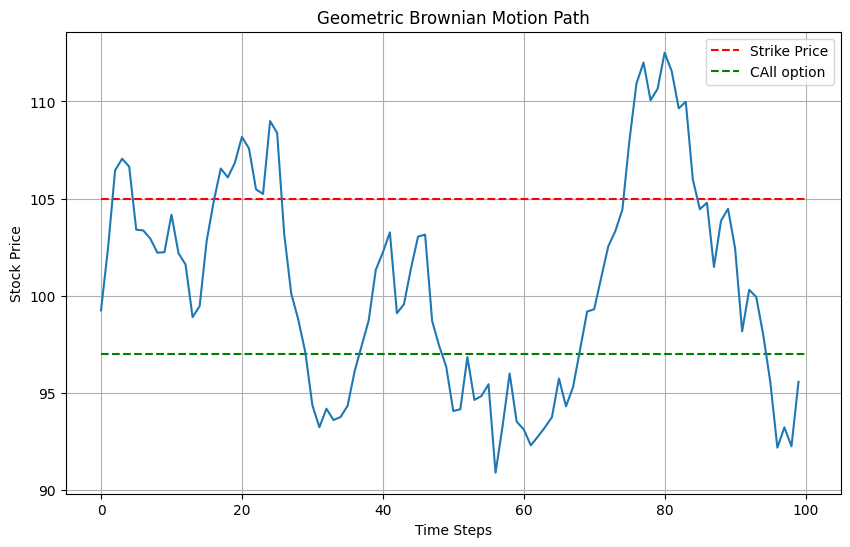

In [51]:
plot_gbm(S0=100, mu=0.05, sigma=0.2, T=1, dt=0.01, strike_price=105)

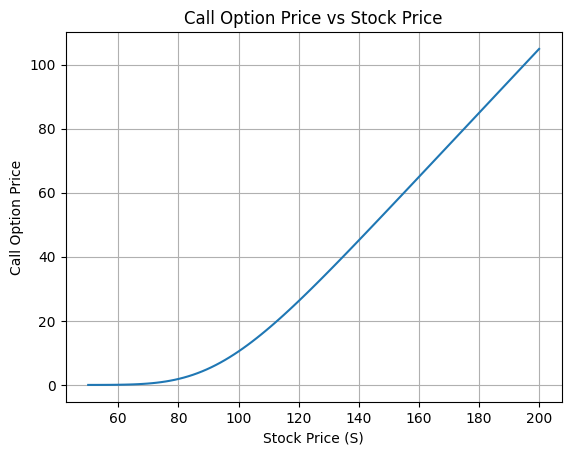

In [54]:
S_vals = np.linspace(50, 200, 100)
prices = [call_option_price(S, K=100, T=1, r=0.05, sigma=0.2) for S in S_vals]

plt.plot(S_vals, prices)
plt.xlabel('Stock Price (S)')
plt.ylabel('Call Option Price')
plt.title('Call Option Price vs Stock Price')
plt.grid(True)
plt.show()